In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from statsmodels.graphics.mosaicplot import mosaic

In [19]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Instructions

 - In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
 - Try a simple linear regression with all the data to see whether we are getting good results.
 - Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
 - Use the function to check LinearRegressor and KNeighborsRegressor.
 - You can check also the MLPRegressor for this task!
 - Check and discuss the results.

In [20]:
X = df.drop('Total Claim Amount', axis=1)
y = df['Total Claim Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)

- Linear regression 

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
model.fit(X_train_num, y_train)

LinearRegression()

In [23]:
model.score(X_test_num, y_test)

0.4941298033423003

In [25]:
model_results(df)

'Linear regression score: 0.5077083337732942, KNN score: 0.4851082811955786'

 - Check also the MLPRegressor for this task

In [33]:
from sklearn.neural_network import MLPRegressor

In [34]:
model = MLPRegressor()
model.fit(X_train, y_train)
print(model)

MLPRegressor()


In [35]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [36]:
from sklearn import metrics
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.3208917696043614


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

<AxesSubplot:>

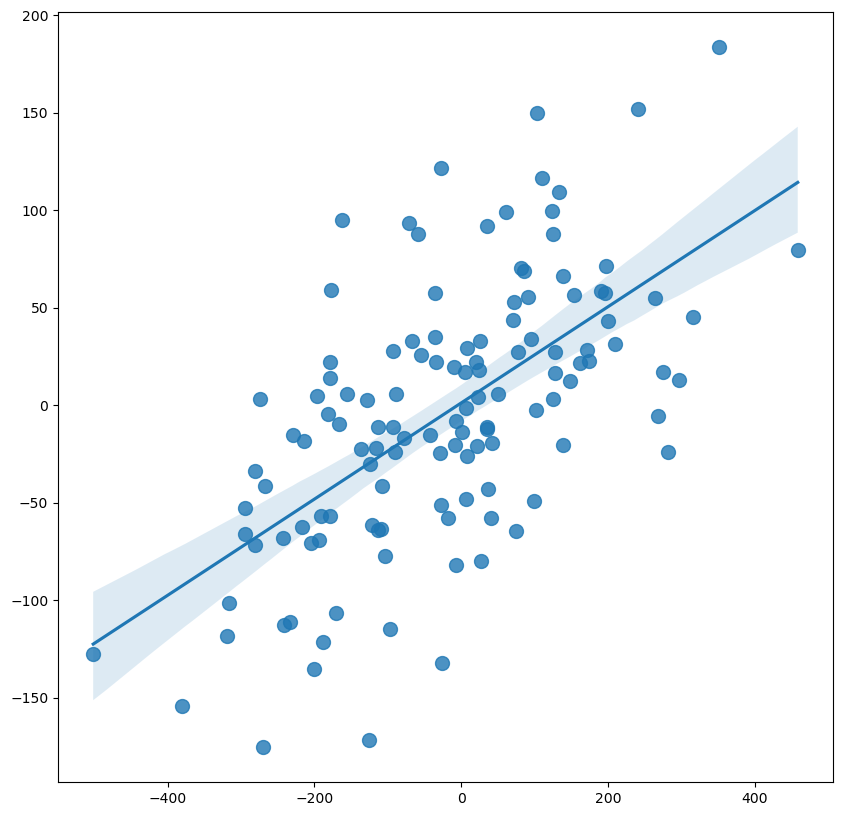

In [37]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})